In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import matplotlib.dates as mdates

In [60]:
df = pd.read_csv('SalesHistory_ItemTypes.csv', header=0)

In [61]:
df.head()

,BusinessWeek,LocationNo,ProductType,count_SalesTransactions,total_SalesAmount,total_QuantitySold
0,NaN,NaN,NaN,375722699,1.978766e+09,422950281
1,NaN,NaN,NaN,868,4.493370e+03,816
2,NaN,NaN,$$,15779,1.739009e+05,16266
3,NaN,NaN,ASTC,4108,1.332707e+04,4011
4,NaN,NaN,ASTM,16568,5.829515e+04,16348


In [62]:
df['BusinessWeek'] = pd.to_datetime(df['BusinessWeek'])
df = df.drop(df[df['BusinessWeek'].isna()].index)

In [63]:
filter_ChainSales = df['LocationNo'].isna() & ~df['BusinessWeek'].isna()
filter_AllProducts = df['ProductType'].isna()
filter_LowSales = df['total_QuantitySold'] < 100

In [64]:
df.drop(df[filter_ChainSales & filter_AllProducts & filter_LowSales].index, inplace=True)

In [65]:
filter_ChainSales = df['LocationNo'].isna() & ~df['BusinessWeek'].isna()
filter_AllProducts = df['ProductType'].isna()
filter_LowSales = df['total_QuantitySold'] < 100

In [66]:
df[filter_ChainSales & filter_AllProducts]

,BusinessWeek,LocationNo,ProductType,count_SalesTransactions,total_SalesAmount,total_QuantitySold
12889,2011-01-03,NaN,NaN,669393,3543491.47,819828
18135,2011-01-10,NaN,NaN,696656,3696345.76,870953
23369,2011-01-17,NaN,NaN,766193,4041178.55,956502
28645,2011-01-24,NaN,NaN,745285,3913032.08,933967
33917,2011-01-31,NaN,NaN,662068,3365147.68,824191
...,...,...,...,...,...,...
3364197,2019-12-02,NaN,NaN,777831,4687517.64,838009
3372321,2019-12-09,NaN,NaN,920537,5827069.18,965305
3380597,2019-12-16,NaN,NaN,1136391,7745011.81,1178811
3388979,2019-12-23,NaN,NaN,1144211,7285375.60,1192277


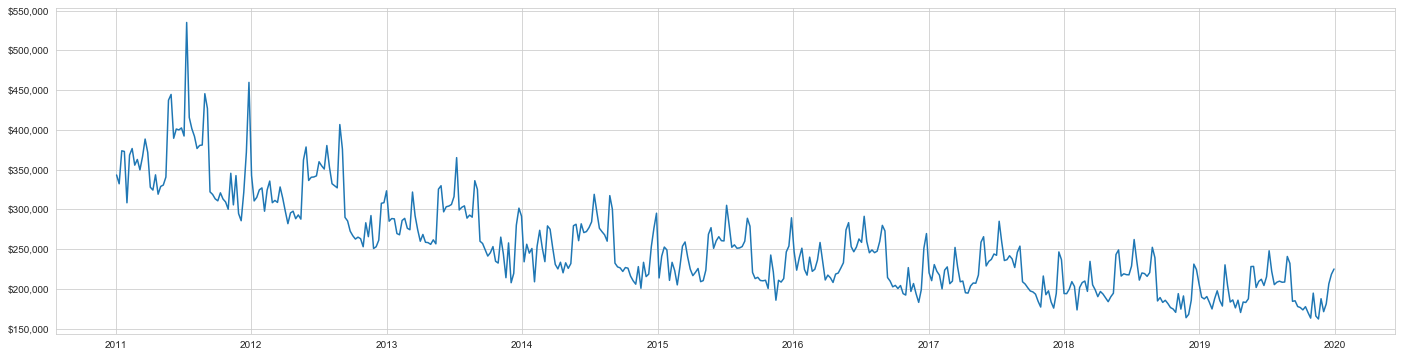

In [67]:
sns.set_style('whitegrid')
filter_PB = df['ProductType'] == 'PB'
fig, ax = plt.subplots(figsize=(24,6))
ax.plot(df[filter_ChainSales & filter_PB]['BusinessWeek'],
                df[filter_ChainSales & filter_PB]['total_SalesAmount'])
ax.set_yticklabels(['${:0,.0f}'.format(i) for i in ax.get_yticks()])
plt.show()

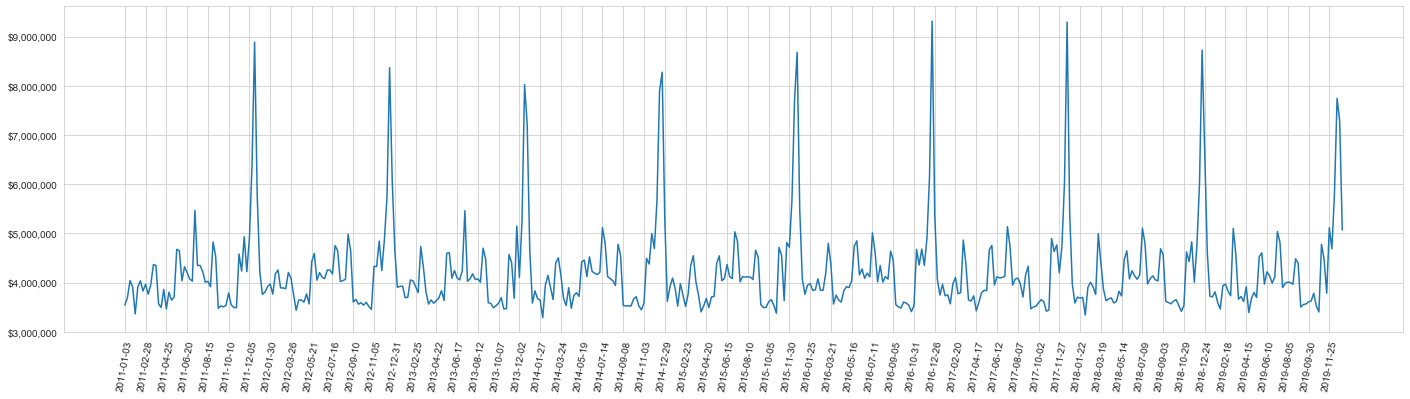

In [89]:
sns.set_style('whitegrid')
filter_All = df['ProductType'].isna()
fig, ax = plt.subplots(figsize=(24,6))
ax.plot(df[filter_ChainSales & filter_All]['BusinessWeek'],
                df[filter_ChainSales & filter_All]['total_SalesAmount'])
ax.set_xticks([d for d in df[filter_ChainSales & filter_All]['BusinessWeek'][::8]])
ax.set_xticklabels([d.strftime('%F') for d in df[filter_ChainSales & filter_All]['BusinessWeek'][::8]], rotation=80)
ax.set_yticklabels(['${:0,.0f}'.format(i) for i in ax.get_yticks()])
plt.show()

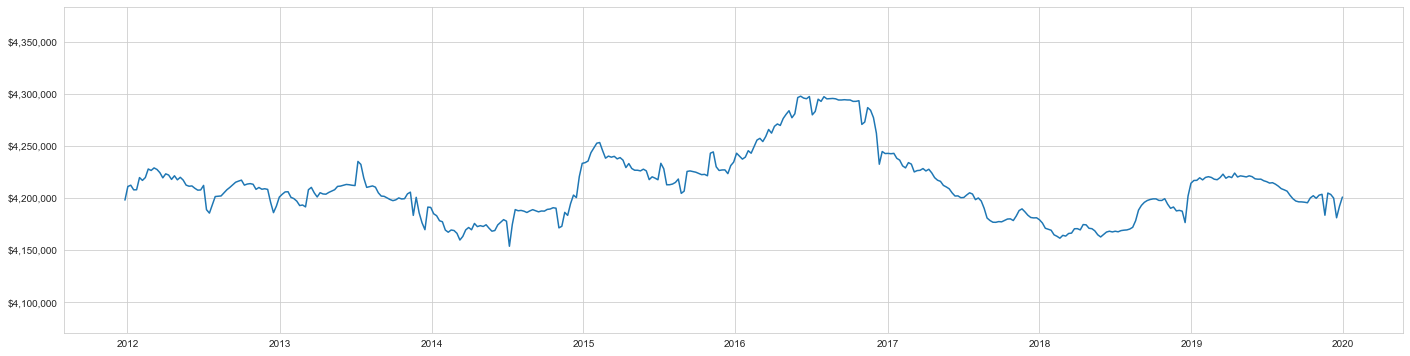

In [80]:
sns.set_style('whitegrid')
filter_All = df['ProductType'].isna()
fig, ax = plt.subplots(figsize=(24,6))
ax.plot(df[filter_ChainSales & filter_All]['BusinessWeek'],
                df[filter_ChainSales & filter_All]['total_SalesAmount'].rolling(52).mean())
ax.set_ylim([df[filter_ChainSales & filter_All]['total_SalesAmount'].rolling(52).mean().min()*0.98, 
             df[filter_ChainSales & filter_All]['total_SalesAmount'].rolling(52).mean().max()*1.02])
ax.set_yticklabels(['${:0,.0f}'.format(i) for i in ax.get_yticks()])

plt.show()

In [49]:
df

,BusinessWeek,LocationNo,ProductType,count_SalesTransactions,total_SalesAmount,total_QuantitySold
0,NaT,NaN,NaN,375464922,1.977034e+09,422708986
1,NaT,NaN,NaN,866,4.473380e+03,814
2,NaT,NaN,$$,16068,1.769206e+05,16559
3,NaT,NaN,ASTC,4130,1.338019e+04,4033
4,NaT,NaN,ASTM,16722,5.892485e+04,16503
...,...,...,...,...,...,...
3409294,2019-12-30,224.0,US,10,4.690000e+01,10
3409295,2019-12-30,224.0,UX,1,2.000000e-01,1
3409296,2019-12-30,224.0,VDU,5,1.893000e+01,12
3409297,2019-12-30,224.0,VGU,2,6.390000e+00,2


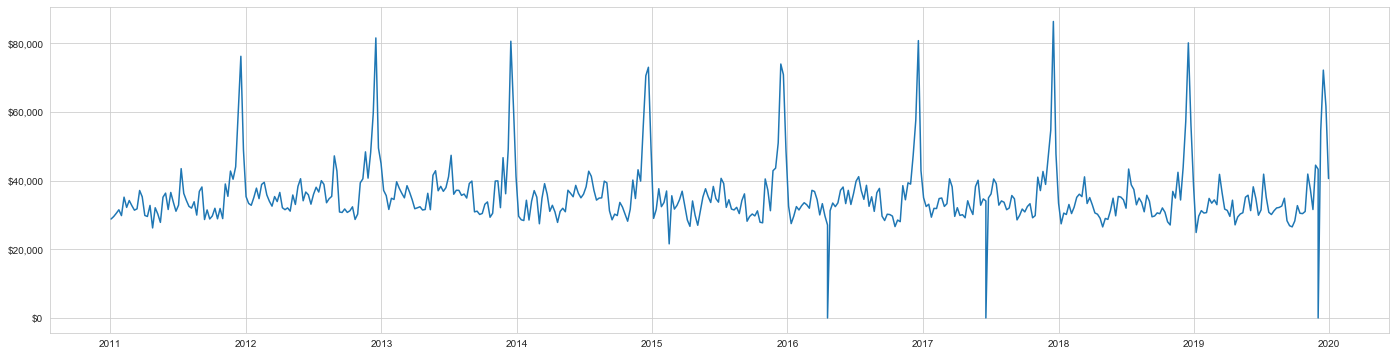

In [70]:
sns.set_style('whitegrid')
filter_All = df['ProductType'].isna()
filter_Loc = df['LocationNo'] == 107
fig, ax = plt.subplots(figsize=(24,6))
ax.plot(df[filter_All & filter_Loc]['BusinessWeek'],
                df[filter_All & filter_Loc]['total_SalesAmount'])
ax.set_yticklabels(['${:0,.0f}'.format(i) for i in ax.get_yticks()])
plt.show()